<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/thermodynamicsOfWax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#@markdown This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).

!pip install neqsim



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


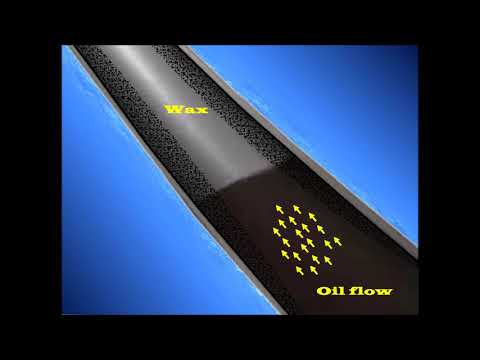

In [6]:
#@title Introduction to Wax
#@markdown This video gives an intriduction to behavour of wax in oil and gas production
from IPython.display import YouTubeVideo
YouTubeVideo('9vne-gWFQBw', width=600, height=400)

# Demonstartion of a wax calculation in neqsim

In [7]:
from neqsim.thermo import *
from neqsim import jNeqSim
jNeqSim.util.database.NeqSimDataBase.setCreateTemporaryTables(True)

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS

fluid1.addComponent("nitrogen", 1.0, "mol/sec")
fluid1.addComponent("CO2", 2.3, "mol/sec")
fluid1.addComponent("methane", 80.0, "mol/sec")
fluid1.addComponent("ethane", 6.0, "mol/sec")
fluid1.addComponent("propane", 3.0, "mol/sec")
fluid1.addComponent("i-butane", 1.0, "mol/sec")
fluid1.addComponent("n-butane", 1.0, "mol/sec")
fluid1.addPlusFraction("C11", 2.95, 217.0 / 1000.0, 0.8331);
fluid1.getCharacterization().characterisePlusFraction();
fluid1.getWaxModel().addTBPWax();
fluid1.createDatabase(True);
fluid1.setMixingRule(2);
fluid1.addSolidComplexPhase("wax");
fluid1.setMultiphaseWaxCheck(True);

fluid1.setTemperature(10.112, "C")
fluid1.setPressure(10.0, "bara")

TPflash(fluid1)
printFrame(fluid1)

fluid1.setTemperature(40.112, "C")
fluid1.setPressure(10.0, "bara")
waxTemp = WAT(fluid1)-273.15
#printFrame(fluid1)
print("WAT ", waxTemp, " °C")


| 0                  | 1           | 2           | 3           | 4           | 5   | 6               |
|:-------------------|:------------|:------------|:------------|:------------|:----|:----------------|
|                    | total       | GAS         | OIL         | WAX         |     |                 |
| nitrogen           | 1.02828E-2  | 1.06838E-2  | 1.7959E-4   | 1.07796E-52 |     | [mole fraction] |
| CO2                | 2.36504E-2  | 2.44213E-2  | 4.35938E-3  | 2.33574E-52 |     | [mole fraction] |
| methane            | 8.22622E-1  | 8.53272E-1  | 5.16971E-2  | 8.36405E-51 |     | [mole fraction] |
| ethane             | 6.16967E-2  | 6.32053E-2  | 2.44685E-2  | 5.87112E-52 |     | [mole fraction] |
| propane            | 3.08483E-2  | 3.03329E-2  | 4.53289E-2  | 2.69588E-52 |     | [mole fraction] |
| i-butane           | 1.02828E-2  | 9.31604E-3  | 3.58279E-2  | 8.00073E-53 |     | [mole fraction] |
| n-butane           | 1.02828E-2  | 8.76066E-3  | 5.03031E-2  | 7.45616E

# Tuning to wax PVT data

Wax PVT studies are typically done by measureing the weigth fraction of wax formed as function of temperature and pressure. In the follwing example we illustrate how the neqsim wax model can be tuned to fit experiemntal data.


In [8]:
from neqsim.thermo import tunewaxmodel
experimentaldata = {'temperature':  [22.0, 20.0, 10.0],
        'pressure':  [10.0, 10.0, 10.0],
        'experiment':  [0.01, 0.02, 0.03]
}

waxfitresults = tunewaxmodel(fluid1, experimentaldata,maxiterations=5) # try reducing maxiterations if convergence problems
print(waxfitresults)

{'temperature': [295.15, 293.15, 283.15], 'pressure': [10.0, 10.0, 10.0], 'experiment': [[1.0, 2.0, 3.0]], 'results': [0.013162839109538726, 0.01554503515913078, 0.03073493567240819], 'parameters': [0.7058050741986903, 0.001330061932390401, 0.3316013778181304]}
